# Memory Information

In [ ]:
import psutil
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
print("="*40, "Memory Information", "="*40)
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}") ; print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}") ; print(f"Percentage: {svmem.percent}%")

======================================== Memory Information ========================================
Total: 25.51GB
Available: 22.46GB
Used: 3.29GB
Percentage: 12.0%


# GPU Information

In [1]:
! nvidia-smi

Tue Aug  4 13:11:20 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [3]:
import time;
start = time.time()
!unzip -q 'gdrive/My Drive/Pull-0-Depth/MonoDepth_Inp_Dataset_192.zip' -d 'Data/'
print (time.time() - start)

229.81849694252014


In [4]:
import time;

start = time.time()
!unzip -q 'gdrive/My Drive/Pull-0-Depth/MonoDepth_GT_Dataset_192.zip' -d 'Data/Dataset/depth_'
print (time.time() - start)

79.44865417480469


In [5]:
import time;

start = time.time()
!unzip -q 'gdrive/My Drive/Pull-0-Depth/bg_192.zip' -d 'Data/Dataset/bg_'
print (time.time() - start)

3.379786491394043


In [1]:
import os

list_m = os.listdir('Data/Dataset/mask_/mask') # dir is your directory path
list_f = os.listdir('Data/Dataset/fg_bg_/fg_bg') # dir is your directory path
list_d = os.listdir('Data/Dataset/depth_/depth') # dir is your directory path
list_b_temp = os.listdir('Data/Dataset/bg_/bg_192') # dir is your directory path

list_f.sort()
list_m.sort()
list_d.sort()
list_b_temp.sort()

list_b = []
for bg in list_b_temp:
    list_b += [bg]*4000

print('No. of fg_bg Images: ', len(list_f))
print('No. of mask Images: ', len(list_m))
print('No. of depth Images: ', len(list_d))
print('No. of backround Images: ', len(list_b))

No. of fg_bg Images:  400000
No. of mask Images:  400000
No. of depth Images:  400000
No. of backround Images:  400000


In [2]:
print('Sample FG_BG Image: ',list_f[351275])
print('Sample BG Image: ',list_b[351275])
print('Sample MASK Image: ',list_m[351275])
print('Sample DEPTh Image: ',list_d[351275])

Sample FG_BG Image:  bg192_87_fg3275.jpg
Sample BG Image:  bg192_87.jpg
Sample MASK Image:  bg192_87_fg3275.jpg
Sample DEPTh Image:  bg192_87_fg3275.jpg


In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import time

In [4]:
#Creating Split of Data for Training and Testing of 70:30
import random

for _ in range(50):
    seed = random.random()
    def rand_num():
        return seed
    random.shuffle(list_f, rand_num)
    random.shuffle(list_b, rand_num)

#Testing if Randomizing worked
print(list_f[351275])
print(list_b[351275])

bg192_19_fg2427.jpg
bg192_19.jpg


In [5]:
list_f #Looks nicely shuffled

['bg192_79_fg3355.jpg',
 'bg192_39_fg3836.jpg',
 'bg192_48_fg3363.jpg',
 'bg192_62_fg2283.jpg',
 'bg192_87_fg1048.jpg',
 'bg192_18_fg0845.jpg',
 'bg192_15_fg0038.jpg',
 'bg192_79_fg3083.jpg',
 'bg192_52_fg1493.jpg',
 'bg192_34_fg0703.jpg',
 'bg192_80_fg3265.jpg',
 'bg192_33_fg3693.jpg',
 'bg192_17_fg1243.jpg',
 'bg192_76_fg2375.jpg',
 'bg192_51_fg3189.jpg',
 'bg192_98_fg1352.jpg',
 'bg192_89_fg0352.jpg',
 'bg192_28_fg2162.jpg',
 'bg192_42_fg3385.jpg',
 'bg192_60_fg1179.jpg',
 'bg192_76_fg0604.jpg',
 'bg192_50_fg2407.jpg',
 'bg192_95_fg0314.jpg',
 'bg192_57_fg2563.jpg',
 'bg192_94_fg1760.jpg',
 'bg192_52_fg0520.jpg',
 'bg192_79_fg1946.jpg',
 'bg192_32_fg0185.jpg',
 'bg192_00_fg0405.jpg',
 'bg192_42_fg0868.jpg',
 'bg192_93_fg1890.jpg',
 'bg192_50_fg3650.jpg',
 'bg192_39_fg2041.jpg',
 'bg192_29_fg2839.jpg',
 'bg192_98_fg0395.jpg',
 'bg192_00_fg1497.jpg',
 'bg192_32_fg0765.jpg',
 'bg192_84_fg3387.jpg',
 'bg192_68_fg1014.jpg',
 'bg192_26_fg3688.jpg',
 'bg192_09_fg3030.jpg',
 'bg192_36_fg342

In [6]:
train_split = int(len(list_f)*0.6)
train_data = list_f[0:train_split]
test_data = list_f[train_split:]
print(len(train_data), len(test_data))

240000 160000


In [7]:
class DepMaskDataset(Dataset):
    def __init__(self, file_list):
        
        self.to_tensor = transforms.ToTensor()
        self.fg_norm = transforms.Normalize(mean = [0.56414794921875, 0.5432481169700623, 0.5214933753013611],
                                            std = [0.208669513463974, 0.213966503739357, 0.2230370044708252])
        self.bg_norm = transforms.Normalize(mean = [0.5810659527778625, 0.5633341670036316, 0.5403051972389221],
                                            std= [0.18558748066425323, 0.19134603440761566, 0.20390349626541138])
        self.mask_norm = transforms.Normalize(mean = 0.09639497846364975,
                                              std = 0.2823259234428406)
        self.depth_norm = transforms.Normalize(mean = 0.40525129437446594,
                                               std = 0.24363896250724792)
        self.file_name_list = file_list
        self.fgbg = 'Data/Dataset/fg_bg_/fg_bg/'
        self.bg = 'Data/Dataset/bg_/bg_192/'
        self.mask = 'Data/Dataset/mask_/mask/'
        self.depth = 'Data/Dataset/depth_/depth/'
        self.len = len(self.file_name_list)

        
    def __getitem__(self, index):
        # stuff

        fg = Image.open(self.fgbg+self.file_name_list[index]).convert('RGB')
        bg = Image.open(self.bg+self.file_name_list[index][0:8]+'.jpg').convert('RGB')
        mask = Image.open(self.mask+self.file_name_list[index]).convert('L')
        mask_arr = np.array(mask)
        mask_arr[mask_arr >= 150] = 255
        mask_arr[mask_arr < 150]  = 0
        mask = Image.fromarray(mask_arr).convert('L')
        depth = Image.open(self.depth+self.file_name_list[index]).convert('L')
        
        fg = self.to_tensor(fg)
        bg = self.to_tensor(bg)
        mask = self.to_tensor(mask)
        depth = self.to_tensor(depth)

        fg = self.fg_norm(fg)
        bg = self.bg_norm(bg)
        mask = self.mask_norm(mask)
        depth = self.depth_norm(depth)

        return {'fgbg': fg, 'bg': bg, 'mask':mask, 'depth': depth}

    def __len__(self):
        return self.len # of how many data(images) you have

In [8]:
train_dataset = DepMaskDataset(train_data)
test_dataset = DepMaskDataset(test_data)

In [9]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

In [10]:
data = next(iter(train_loader))
print(type(data))
print(len(data))

<class 'dict'>
4


In [11]:
print(len(train_loader))
print(len(test_loader))

7500
5000


In [12]:
print('Number of fg_bg Images in one batch: ', data['fgbg'].shape)
print('Number of bg Images in one batch: ', data['bg'].shape)
print('Number of mask Images in one batch: ', data['mask'].shape)
print('Number of depth Images in one batch: ', data['depth'].shape)

Number of fg_bg Images in one batch:  torch.Size([32, 3, 192, 192])
Number of bg Images in one batch:  torch.Size([32, 3, 192, 192])
Number of mask Images in one batch:  torch.Size([32, 1, 192, 192])
Number of depth Images in one batch:  torch.Size([32, 1, 192, 192])


In [ ]:
from tqdm import tqdm
load_start = time.time()
pbar = tqdm(train_loader)
for batch_idx, data in enumerate(pbar):
        fgbg, bg = data['fgbg'].to('cuda'), data['bg'].to('cuda')
        mask, depth = data['mask'].to('cuda'), data['depth'].to('cuda')
        model_inp = torch.cat((fgbg, bg), dim=1)
load_end = time.time()
print('\n Total Loading Time ',load_end-load_start)

  4%|▍         | 314/7500 [00:31<08:25, 14.21it/s]

In [14]:
from UNet import UNet
from loss import BCEDiceLoss, RMSELoss, rmse, miou
import torch.optim as optim
from tqdm import tqdm
import gc

In [15]:
model = UNet(6).to('cuda')
optimizer = optim.Adam(model.parameters())

In [16]:
from torchsummary import summary
summary(model, (6,192,192))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 192, 192]           3,456
       BatchNorm2d-2         [-1, 64, 192, 192]             128
              ReLU-3         [-1, 64, 192, 192]               0
            Conv2d-4         [-1, 64, 192, 192]          36,864
       BatchNorm2d-5         [-1, 64, 192, 192]             128
              ReLU-6         [-1, 64, 192, 192]               0
        DoubleConv-7  [[-1, 64, 192, 192], [-1, 64, 192, 192]]               0
         MaxPool2d-8           [-1, 64, 96, 96]               0
            Conv2d-9          [-1, 128, 96, 96]          73,728
      BatchNorm2d-10          [-1, 128, 96, 96]             256
             ReLU-11          [-1, 128, 96, 96]               0
           Conv2d-12          [-1, 128, 96, 96]         147,456
      BatchNorm2d-13          [-1, 128, 96, 96]             256
             ReLU-14    

In [17]:
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:
            Tensor: Normalized image.
        """
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
            # The normalize code -> t.sub_(m).div_(s)
        return tensor

In [21]:
def train(train_loader, model, optimizer):

    gc.collect()
    torch.cuda.empty_cache()

    model.train()
    pbar = tqdm(train_loader)
    seg_crit = BCEDiceLoss()
    dep_crit = RMSELoss()
    load_time, pred_time, loss_time, back_time, misc_time = 0,0,0,0,0
    start = time.time()
    total_segloss, total_deploss, total_ = 0,0,0
    total_iou, total_rmse = 0,0

    for batch_idx, data in enumerate(pbar):
        load_start = time.time()
        fgbg, bg = data['fgbg'].to('cuda'), data['bg'].to('cuda')
        mask, depth = data['mask'].to('cuda'), data['depth'].to('cuda')

        model_inp = torch.cat((fgbg, bg), dim=1)
        load_end = time.time()
        load_time += load_end - load_start

        pred_start = time.time()
        optimizer.zero_grad()
        y_pred = model(model_inp)
        pred_end = time.time()
        pred_time += pred_end - pred_start

        loss_start = time.time()
        seg_loss = seg_crit(y_pred[:, :1, :, :], mask)
        dep_loss = dep_crit(y_pred[:, 1:, :, :], depth)
        total_loss = seg_loss + dep_loss
        with torch.no_grad():
            total_segloss += seg_loss
            total_deploss += dep_loss
            total_iou += miou(y_pred[:, :1, :, :], mask)
            total_rmse += rmse(y_pred[:, 1:, :, :], depth)
            total_ += total_loss
        loss_end = time.time()
        loss_time += loss_end - loss_start

        back_start = time.time()
        total_loss.backward()
        optimizer.step()
        back_end = time.time()
        back_time += back_end - back_start
        

    print('\nLoad Time: ', load_time)
    print('Prediciton Time: ', pred_time)
    print('Loss Time: ', loss_time)
    print('Backprop Time: ', back_time)
    print('Total Time for One Batch: ', time.time() - start)
    print('********************* LOSSES ****************************')
    print('Segmentation Loss: ', (total_segloss/len(pbar)).item())
    print('Depth Loss: ', (total_deploss/len(pbar)).item())
    print('Total Loss: ', (total_/len(pbar)).item())
    print('mean IOU: ', (total_iou/len(pbar)).item())
    print('mean RMSE: ', (total_rmse/len(pbar)).item())
    print('********************* ****** ****************************')

    del fgbg, bg, mask, depth
    del model_inp, y_pred
    
    gc.collect()
    torch.cuda.empty_cache()

In [22]:
def test(test_loader, model):

    gc.collect()
    torch.cuda.empty_cache()

    model.eval()
    pbar = tqdm(test_loader)
    seg_crit = BCEDiceLoss()
    dep_crit = RMSELoss()
    load_time, pred_time, loss_time= 0,0,0
    start = time.time()
    total_segloss, total_deploss, total_ = 0,0,0
    total_iou, total_rmse = 0,0

    with torch.no_grad():
        for batch_idx, data in enumerate(pbar):
            load_start = time.time()
            fgbg, bg = data['fgbg'].to('cuda'), data['bg'].to('cuda')
            mask, depth = data['mask'].to('cuda'), data['depth'].to('cuda')

            model_inp = torch.cat((fgbg, bg), dim=1)
            load_end = time.time()
            load_time += load_end - load_start

            pred_start = time.time()
            optimizer.zero_grad()
            y_pred = model(model_inp)
            pred_end = time.time()
            pred_time += pred_end - pred_start

            loss_start = time.time()
            seg_loss = seg_crit(y_pred[:, :1, :, :], mask)
            dep_loss = dep_crit(y_pred[:, 1:, :, :], depth)
            total_segloss += seg_loss
            total_deploss += dep_loss
            total_ += seg_loss + dep_loss
            total_iou += miou(y_pred[:, :1, :, :], mask)
            total_rmse += rmse(y_pred[:, 1:, :, :], depth)
            loss_end = time.time()
            loss_time += loss_end - loss_start

        

    print('\nLoad Time: ', load_time)
    print('Prediciton Time: ', pred_time)
    print('Loss Time: ', loss_time)
    print('Total Time for One Batch: ', time.time() - start)
    print('********************* LOSSES ****************************')
    print('Segmentation Loss: ', (total_segloss/len(pbar)).item())
    print('Depth Loss: ', (total_deploss/len(pbar)).item())
    print('Total Loss: ', (total_/len(pbar)).item())
    print('mean IOU: ', (total_iou/len(pbar)).item())
    print('mean RMSE: ', (total_rmse/len(pbar)).item())
    print('********************* ****** ****************************')

    return mask, depth, y_pred[:, :1, :, :], y_pred[:, 1:, :, :]
    

In [20]:
start_process = time.time()
for i in range(1):
    epoch_time = time.time()
    train(train_loader, model, optimizer)
    print(f'********* EPOCH {i+1} TIME: {time.time()-epoch_time} seconds')
    print('******************************************************************************************************************')
torch.cuda.empty_cache()
mask_gt, depth_gt, mask_ot, depth_ot = test(test_loader, model)
print('Total Time: ', time.time() - start_process)

100%|██████████| 7500/7500 [1:02:46<00:00,  1.99it/s]



Load Time:  3552.422415971756
Prediciton Time:  51.90856742858887
Loss Time:  9.928146839141846
Backprop Time:  89.33864426612854
Total Time for One Batch:  3766.813965320587
********************* LOSSES ****************************
Segmentation Loss:  1.0988737344741821
Depth Loss:  0.0953473448753357
Total Loss:  1.2895734310150146
mean IOU:  0.2720769941806793
mean RMSE:  0.0953473448753357
********************* ****** ****************************


  0%|          | 0/5000 [00:00<?, ?it/s]

********* EPOCH 1 TIME: 3767.629892349243 seconds
******************************************************************************************************************
502877184
502877184


100%|██████████| 5000/5000 [13:49<00:00,  6.03it/s]


Load Time:  743.6292185783386
Prediciton Time:  29.26480507850647
Loss Time:  5.967700004577637
Total Time for One Batch:  829.4124953746796
********************* LOSSES ****************************
Segmentation Loss:  1.0973565578460693
Depth Loss:  0.08208338171243668
Total Loss:  1.1794400215148926
mean IOU:  0.27251511812210083
mean RMSE:  0.08208338171243668
********************* ****** ****************************
Total Time:  4597.264750003815


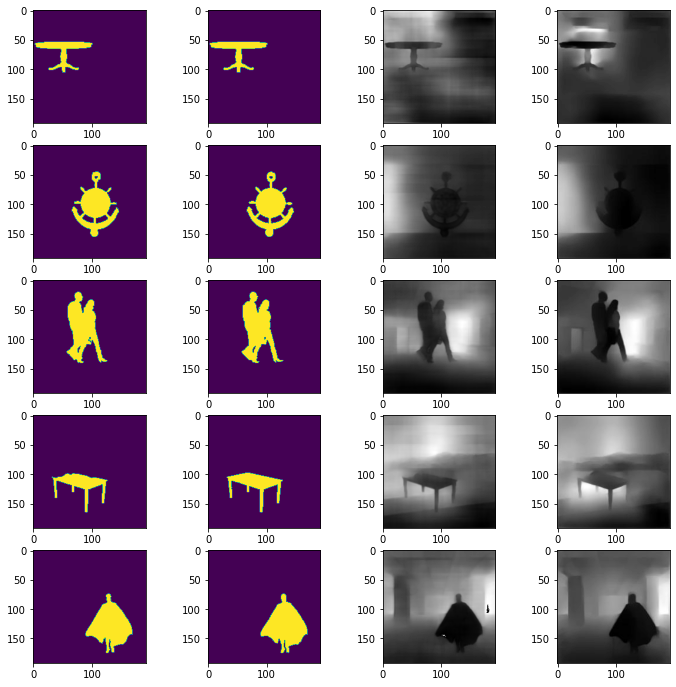

In [23]:
unnorm_mask = UnNormalize(mean= [0.09639497846364975*255], std= [0.2823259234428406*255])
unnorm_depth = UnNormalize(mean= [0.40525129437446594*255], std= [0.24363896250724792*255])

plt.figure(figsize=(12,12))
for i in range(1,20,4):
    plt.subplot(5,4,i)
    img = mask_ot[i+5]
    unnorm_mask(img)
    img[img >= 150] = 255
    img[img < 150]  = 0
    img = (img.cpu().numpy().transpose(1,2,0)).astype(np.uint8)[:,:,0]
    plt.imshow(img)
    plt.subplot(5,4,i+1)
    img = mask_gt[i+5]
    unnorm_mask(img)
    img = (img.cpu().numpy().transpose(1,2,0)).astype(np.uint8)[:,:,0]
    plt.imshow(img)
    plt.subplot(5,4,i+2)
    img = depth_ot[i+5]
    unnorm_depth(img)
    img = (img.cpu().numpy().transpose(1,2,0)).astype(np.uint8)[:,:,0]
    plt.imshow(img, cmap='binary_r')
    plt.subplot(5,4,i+3)
    img = depth_gt[i+5]
    unnorm_depth(img)
    img = (img.cpu().numpy().transpose(1,2,0)).astype(np.uint8)[:,:,0]
    plt.imshow(img, cmap='binary_r')

In [24]:
torch.save({
            'epoch': 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            }, '/content/gdrive/My Drive/Pull-0-Dept_old/model_weights/weights_ep1.pth')

In [25]:
start_process = time.time()
for i in range(1,5):
    epoch_time = time.time()
    train(train_loader, model, optimizer)
    print(f'********* EPOCH {i+1} TIME: {time.time()-epoch_time} seconds')
    print('******************************************************************************************************************')
torch.cuda.empty_cache()
mask_gt, depth_gt, mask_ot, depth_ot = test(test_loader, model)
print('Total Time: ', time.time() - start_process)

100%|██████████| 7500/7500 [1:02:48<00:00,  1.99it/s]



Load Time:  3553.8870902061462
Prediciton Time:  50.992801666259766
Loss Time:  9.63157033920288
Backprop Time:  87.18247818946838
Total Time for One Batch:  3768.0245504379272
********************* LOSSES ****************************
Segmentation Loss:  1.0972543954849243
Depth Loss:  0.07691120356321335
Total Loss:  1.1741682291030884
mean IOU:  0.2722605764865875
mean RMSE:  0.07691120356321335
********************* ****** ****************************


  0%|          | 0/7500 [00:00<?, ?it/s]

********* EPOCH 2 TIME: 3768.869613647461 seconds
******************************************************************************************************************


100%|██████████| 7500/7500 [1:02:48<00:00,  1.99it/s]



Load Time:  3555.208991765976
Prediciton Time:  50.41829299926758
Loss Time:  9.589194774627686
Backprop Time:  86.23790264129639
Total Time for One Batch:  3768.022871732712
********************* LOSSES ****************************
Segmentation Loss:  1.0968296527862549
Depth Loss:  0.07116475701332092
Total Loss:  1.1679964065551758
mean IOU:  0.27231353521347046
mean RMSE:  0.07116475701332092
********************* ****** ****************************


  0%|          | 0/7500 [00:00<?, ?it/s]

********* EPOCH 3 TIME: 3768.826387643814 seconds
******************************************************************************************************************


  1%|          | 67/7500 [00:33<1:02:11,  1.99it/s]

KeyboardInterrupt: ignored

In [26]:
torch.save({
            'epoch': 3,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            }, '/content/gdrive/My Drive/Pull-0-Dept_old/model_weights/weights_ep5.pth')

In [ ]:
mask_gt, depth_gt, mask_ot, depth_ot = test(test_loader, model)

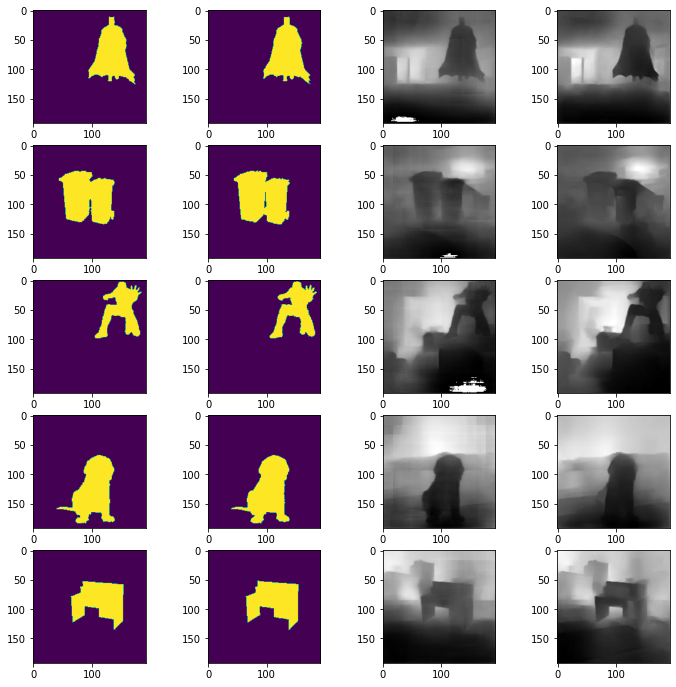

In [31]:
unnorm_mask = UnNormalize(mean= [0.09639497846364975*255], std= [0.2823259234428406*255])
unnorm_depth = UnNormalize(mean= [0.40525129437446594*255], std= [0.24363896250724792*255])

plt.figure(figsize=(12,12))
for i in range(1,20,4):
    plt.subplot(5,4,i)
    img = mask_ot[i+2]
    unnorm_mask(img)
    img[img >= 150] = 255
    img[img < 150]  = 0
    img = (img.cpu().numpy().transpose(1,2,0)).astype(np.uint8)[:,:,0]
    plt.imshow(img)
    plt.subplot(5,4,i+1)
    img = mask_gt[i+2]
    unnorm_mask(img)
    img = (img.cpu().numpy().transpose(1,2,0)).astype(np.uint8)[:,:,0]
    plt.imshow(img)
    plt.subplot(5,4,i+2)
    img = depth_ot[i+2]
    unnorm_depth(img)
    img = (img.cpu().numpy().transpose(1,2,0)).astype(np.uint8)[:,:,0]
    plt.imshow(img, cmap='binary_r')
    plt.subplot(5,4,i+3)
    img = depth_gt[i+2]
    unnorm_depth(img)
    img = (img.cpu().numpy().transpose(1,2,0)).astype(np.uint8)[:,:,0]
    plt.imshow(img, cmap='binary_r')